In [ ]:
!git clone https://github.com/deep-diver/yolov3-tf2.git

Cloning into 'yolov3-tf2'...
remote: Enumerating objects: 164, done.
remote: Total 164 (delta 0), reused 0 (delta 0), pack-reused 164
Receiving objects: 100% (164/164), 2.47 MiB | 21.98 MiB/s, done.
Resolving deltas: 100% (95/95), done.


In [ ]:
!cat ./test\ drive

cat: './test drive': No such file or directory


In [ ]:
!pip install -r ./yolov3-tf2/requirements.txt

     |████████████████████████████████| 25.4MB 107kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


In [ ]:
!pip install -U tensorflow-gpu=="2.0.0"

     |████████████████████████████████| 380.8MB 38kB/s 
     |████████████████████████████████| 3.8MB 42.4MB/s 
     |████████████████████████████████| 450kB 35.7MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=78fdc368afd33b8beae946452f5f853c283357e5d7838c0b633c3d52a970b66b
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.3.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorboard<3,>=2.3.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorflow-estimator<2.4.0,>=2.3.0, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing ins

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [ ]:
!ls

checkpoints  detect.py	      LICENSE	   requirements.txt  YOLOv3.py
convert.py   environment.yml  __pycache__  sample_data	     yolov3_tf2
data	     __init__.py      README.md    train.py	     yolov3-tf2


In [ ]:
!cp -r yolov3-tf2/* ./

In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights -O ./data/yolov3.weights

--2020-08-04 00:39:50--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘./data/yolov3.weights’

./data/yolov3.weigh 100%[===================>] 236.52M  1.68MB/s    in 3m 14s  

2020-08-04 00:43:05 (1.22 MB/s) - ‘./data/yolov3.weights’ saved [248007048/248007048]



In [ ]:
!ls

checkpoints  detect.py	      LICENSE		sample_data  yolov3_tf2
convert.py   environment.yml  README.md		train.py     yolov3-tf2
data	     __init__.py      requirements.txt	YOLOv3.py


In [ ]:
from YOLOv3 import convert

In [ ]:
tf.combined_non_max_suppression = tf.image.combined_non_max_suppression
convert()

Model: "yolov3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
yolo_darknet (Model)            ((None, None, None,  40620640    input_1[0][0]                    
__________________________________________________________________________________________________
yolo_conv_0 (Model)             (None, None, None, 5 11024384    yolo_darknet[1][2]               
__________________________________________________________________________________________________
yolo_conv_1 (Model)             (None, None, None, 2 2957312     yolo_conv_0[1][0]                
                                                                 yolo_darknet[1][1]          

In [ ]:
from YOLOv3 import detect

In [ ]:
detect()

In [ ]:
!ls

checkpoints  environment.yml  __pycache__	train.py
convert.py   __init__.py      README.md		YOLOv3.py
data	     LICENSE	      requirements.txt	yolov3_tf2
detect.py    output.jpg       sample_data	yolov3-tf2


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from YOLOv3 import detect
import numpy as np
from google.colab import files

uploaded = files.upload()

columns = 2
rows = 1
fig = plt.figure(figsize=(40, 12))

i = 1

for fn in uploaded.keys():
  # predicting images
  path='/content/' + fn
  detect(image=path, classes='./data/coco.names')
  
  img = mpimg.imread('./output.jpg')
  
  ax = fig.add_subplot(rows, columns, i)
  ax.imshow(img)
  
  i = i + 1
  
plt.show()

<Figure size 2880x864 with 0 Axes>

# Loading Simpson Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!ls gdrive/My\ Drive/yolo_swimcar

swimcar.names  training_data.zip  train.tfrecord  val.tfrecord


In [ ]:
!rm ./data/swimcar.names

rm: cannot remove './data/swimcar.names': No such file or directory


In [ ]:
!cp gdrive/My\ Drive/yolo_swimcar/swimcar.names ./data/

In [ ]:
!cp gdrive/My\ Drive/swimcar.names ./data/

cp: cannot stat 'gdrive/My Drive/swimcar.names': No such file or directory


In [ ]:
!rm ./data/swimcar_train.tfrecord

rm: cannot remove './data/swimcar_train.tfrecord': No such file or directory


In [ ]:
!cp gdrive/My\ Drive/yolo_swimcar/train.tfrecord ./data/

In [ ]:
!cp gdrive/My\ Drive/yolo_swimcar/val.tfrecord ./data/

In [ ]:
!cp gdrive/My\ Drive/yolo_swimcar/training_data.zip ./data/

In [ ]:
!unzip -q ./data/training_data.zip

In [ ]:
!mv ./training_data/ ./data/

# Displaying some images

In [ ]:
import os

target_annotations = []
annotations = os.listdir('./data/training_data/labels/')

count = 0

for annotation in annotations:
  target_annotations.append(annotation)
  
  if count == 6:
    break;
    
  count = count + 1

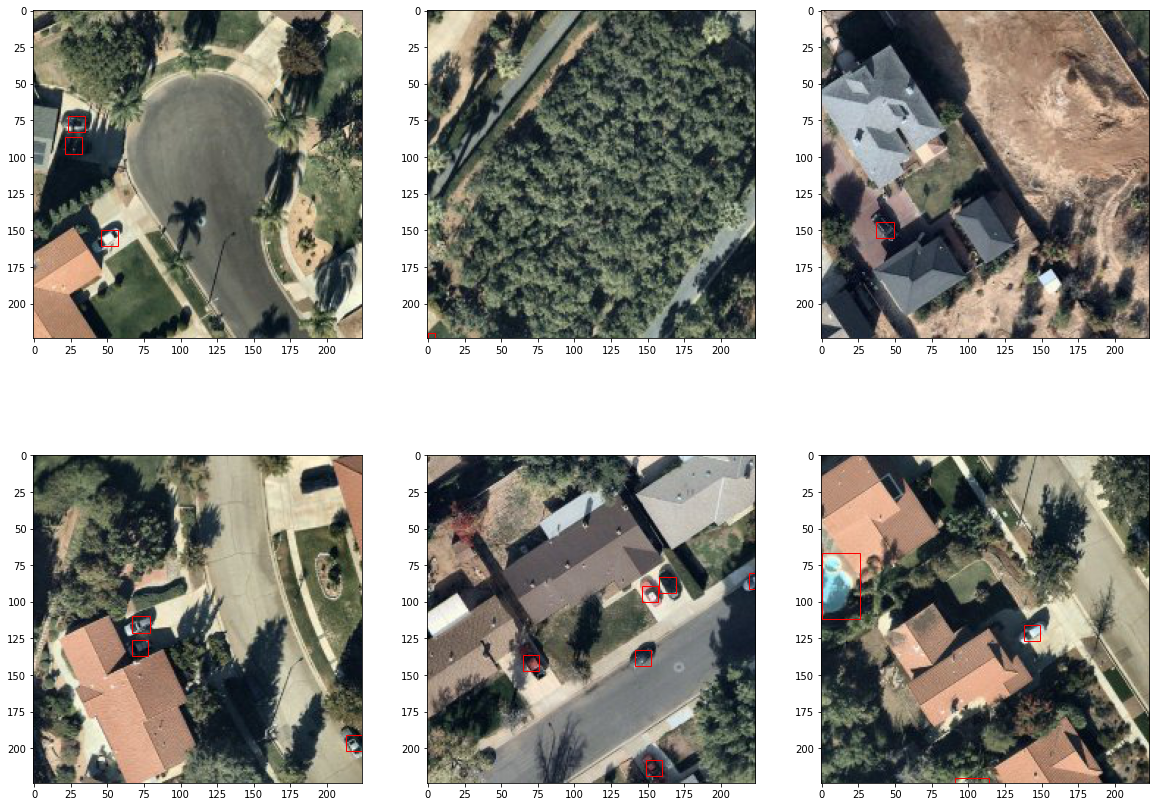

In [ ]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
import numpy as np

fig=plt.figure(figsize=(20, 15))

columns = 3
rows = 2

for i in range(1, columns*rows +1):
  image_file = './data/training_data/images/' + target_annotations[i].split('.')[0] + '.jpg'
  img = np.array(Image.open(image_file), dtype=np.uint8)
  
  ax = fig.add_subplot(rows, columns, i)
  ax.imshow(img)
  
  tree = ET.parse('./data/training_data/labels/' + target_annotations[i])
  root = tree.getroot()

  objects = []
  objects_info = root.findall('./object')

  for object_info in objects_info:
      top_x = int(float(object_info[1][0].text))
      top_y = int(float(object_info[1][1].text))

      btm_x = int(float(object_info[1][2].text))
      btm_y = int(float(object_info[1][3].text))

      # Create a Rectangle patch
      rect = patches.Rectangle((top_x,top_y),btm_x-top_x,btm_y-top_y,linewidth=1,edgecolor='r',facecolor='none')

      # Add the patch to the Axes
      ax.add_patch(rect)
      
plt.show()

# Training

In [ ]:
import os
import tensorflow as tf
import numpy as np
import cv2
from tensorflow.keras.callbacks import (
    ReduceLROnPlateau,
    EarlyStopping,
    ModelCheckpoint,
    TensorBoard,
    LambdaCallback
)
from yolov3_tf2.models import (
    YoloV3, YoloLoss,
    yolo_anchors, yolo_anchor_masks,
    yolo_tiny_anchors, yolo_tiny_anchor_masks
)
from yolov3_tf2.utils import freeze_all
import yolov3_tf2.dataset as dataset

In [ ]:
print(tf.__version__)

2.0.0


## Loading Dataset

In [ ]:
model = YoloV3(416, training=True)
anchors = yolo_anchors
anchor_masks = yolo_anchor_masks

In [ ]:
model.summary()

Model: "yolov3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_21 (InputLayer)           [(None, 416, 416, 3) 0                                            
__________________________________________________________________________________________________
yolo_darknet (Model)            multiple             40620640    input_21[0][0]                   
__________________________________________________________________________________________________
yolo_conv_0 (Model)             (None, 13, 13, 512)  11024384    yolo_darknet[1][2]               
__________________________________________________________________________________________________
yolo_conv_1 (Model)             (None, 26, 26, 256)  2957312     yolo_conv_0[1][0]                
                                                                 yolo_darknet[1][1]          

In [ ]:
batch_size = 8

In [ ]:
train_dataset = dataset.load_tfrecord_dataset('./data/train.tfrecord', './data/swimcar.names')
train_dataset = train_dataset.shuffle(buffer_size=1024)  # TODO: not 1024
train_dataset = train_dataset.batch(batch_size)
train_dataset = train_dataset.map(lambda x, y: (
    dataset.transform_images(x, 416),
    dataset.transform_targets(y, anchors, anchor_masks, 80)))
train_dataset = train_dataset.prefetch(
    buffer_size=tf.data.experimental.AUTOTUNE)

In [ ]:
val_dataset = dataset.load_tfrecord_dataset('./data/val.tfrecord', './data/swimcar.names')
val_dataset = val_dataset.shuffle(buffer_size=1024)  # TODO: not 1024
val_dataset = val_dataset.batch(batch_size)
val_dataset = val_dataset.map(lambda x, y: (
    dataset.transform_images(x, 416),
    dataset.transform_targets(y, anchors, anchor_masks, 80)))
val_dataset = val_dataset.prefetch(
    buffer_size=tf.data.experimental.AUTOTUNE)

## Loading Weight

In [ ]:
  model.load_weights('./checkpoints/yolov3.tf')

## Fine Tuning

In [ ]:
darknet = model.get_layer('yolo_darknet')
freeze_all(darknet)

## Optimizer & Loss

In [ ]:
learning_rate = 0.00001
epochs = 20

In [ ]:
optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
loss = [YoloLoss(anchors[mask], classes=80) for mask in anchor_masks]

In [ ]:
!ls ./data

checkpoint  meme2.jpeg	  street.jpg	  training_data      val.tfrecord
coco.names  meme.jpg	  street_out.jpg  training_data.zip  yolov3.weights
girl.png    meme_out.jpg  swimcar.names   train.tfrecord


In [ ]:
model.compile(optimizer=optimizer, loss=loss)

callbacks = [
    ReduceLROnPlateau(verbose=1),
    EarlyStopping(patience=3, verbose=1),
    ModelCheckpoint('checkpoints/yolov3_train_{epoch}.tf',
                    verbose=1, save_weights_only=True),
    TensorBoard(log_dir='logs')
]

history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=20,
                    callbacks=callbacks)

Epoch 1/20
    350/Unknown - 93s 266ms/step - loss: 39.5052 - yolo_output_0_loss: 3.2616 - yolo_output_1_loss: 3.4844 - yolo_output_2_loss: 22.4464
Epoch 00001: saving model to checkpoints/yolov3_train_1.tf
350/350 [==============================] - 115s 330ms/step - loss: 39.5052 - yolo_output_0_loss: 3.2616 - yolo_output_1_loss: 3.4844 - yolo_output_2_loss: 22.4464 - val_loss: 0.0000e+00 - val_yolo_output_0_loss: 0.0000e+00 - val_yolo_output_1_loss: 0.0000e+00 - val_yolo_output_2_loss: 0.0000e+00
Epoch 2/20
79/80 [============================>.] - ETA: 0s - loss: 24.5280 - yolo_output_0_loss: 1.4305 - yolo_output_1_loss: 2.0714 - yolo_output_2_loss: 10.7229
Epoch 00002: saving model to checkpoints/yolov3_train_2.tf
350/350 [==============================] - 96s 273ms/step - loss: 25.7374 - yolo_output_0_loss: 1.1606 - yolo_output_1_loss: 1.7608 - yolo_output_2_loss: 12.8718 - val_loss: 26.0054 - val_yolo_output_0_loss: 1.4054 - val_yolo_output_1_loss: 1.9230 - val_yolo_output_2_loss:

## Test

Saving 000000876.jpg to 000000876 (1).jpg
Saving 000001182.jpg to 000001182 (1).jpg
Saving 000002469.jpg to 000002469 (1).jpg
Saving 000002518.jpg to 000002518 (1).jpg
Saving 000002621.jpg to 000002621 (1).jpg
Saving 000002662.jpg to 000002662 (1).jpg


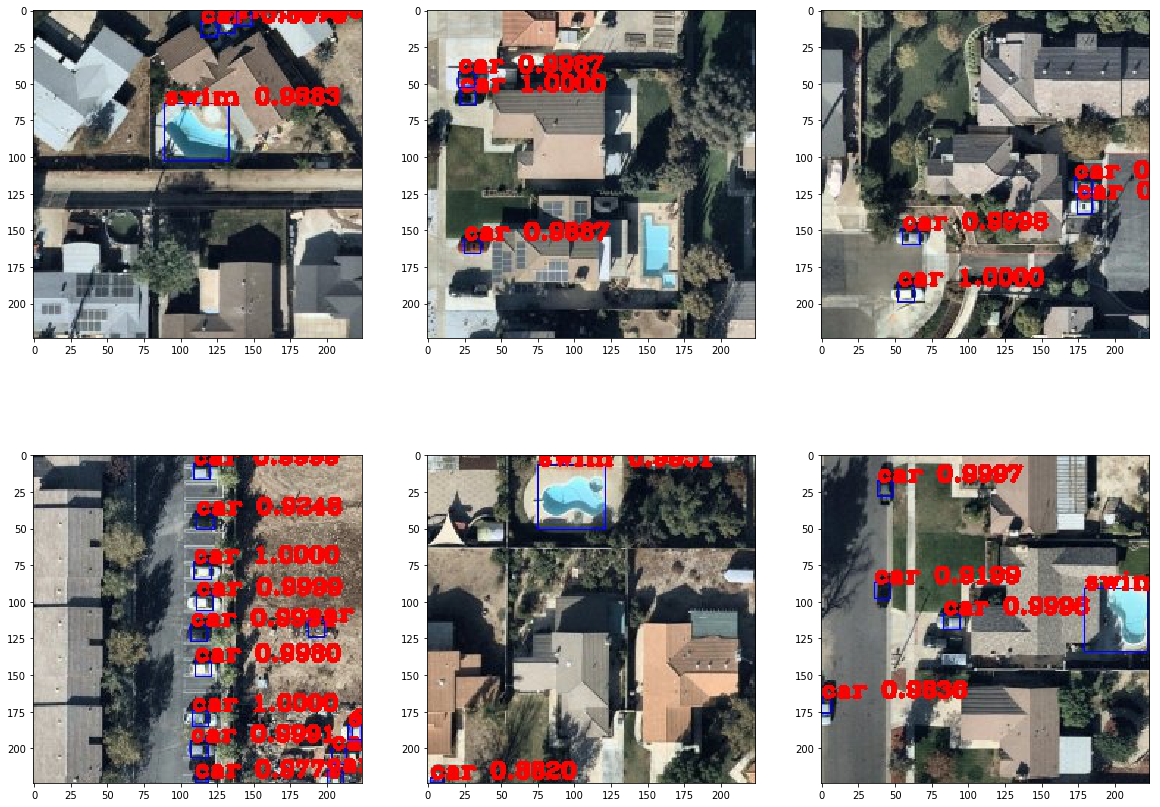

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from YOLOv3 import detect
import numpy as np
from google.colab import files

uploaded = files.upload()

columns = 3
rows = len(uploaded.keys()) / columns
fig = plt.figure(figsize=(20, 15))

i = 1

for fn in uploaded.keys():
  # predicting images
  path='/content/' + fn
  detect(image=path, classes='./data/swimcar.names', weights='./checkpoints/yolov3_train_4.tf')
  
  img = mpimg.imread('./output.jpg')
  
  ax = fig.add_subplot(rows, columns, i)
  ax.imshow(img)
  
  i = i + 1
  
plt.show()

In [ ]:
!cat ./data/swimcar.names

swim
car